In [1]:
import numpy as np  
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
df11 = pd.read_csv('subject101.csv',delimiter=',')
df12 = pd.read_csv('subject102.csv',delimiter=',')
df13 = pd.read_csv('subject103.csv',delimiter=',')
df14 = pd.read_csv('subject104.csv',delimiter=',')
df15 = pd.read_csv('subject105.csv',delimiter=',')
df16 = pd.read_csv('subject106.csv',delimiter=',')
df17 = pd.read_csv('subject107.csv',delimiter=',')
df18 = pd.read_csv('subject108.csv',delimiter=',')
df19 = pd.read_csv('subject109.csv',delimiter=',')
df21 = pd.read_csv('subject201.csv',delimiter=',')
df25 = pd.read_csv('subject205.csv',delimiter=',')
df26 = pd.read_csv('subject206.csv',delimiter=',')
df28 = pd.read_csv('subject208.csv',delimiter=',')
df29 = pd.read_csv('subject209.csv',delimiter=',')
df = pd.concat([df11,df12,df13,df14,df15,df16,df17,df18,df19,df21,df25,df26,df28,df29])
from sklearn.model_selection import train_test_split
X = df.iloc[:,2:]
y = df.iloc[:,1]
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.02,test_size=0.0025, shuffle = True,stratify=y)
def norm(df):
    df_norm = (df - df.mean()) / (df.max() - df.min())
    return df_norm
X_train = norm(X_train)
X_test = norm(X_test)
clf = svm.LinearSVC(penalty='l1',dual=False)
parameters = {'C':np.logspace(-10, 10, num=10, base=2)}
grid = GridSearchCV(clf,parameters,cv=10)
grid.fit(X_train,y_train)
print grid
print clf
print grid.best_params_
print grid.score(X_test,y_test)


GridSearchCV(cv=10, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([9.76562e-04, 4.55675e-03, 2.12623e-02, 9.92126e-02, 4.62937e-01,
       2.16012e+00, 1.00794e+01, 4.70315e+01, 2.19454e+02, 1.02400e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0)
{'C': 47.03150375281921}
0.704829003375899


In [20]:
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
# hamming_loss(y_true, y_pred)
# accuracy_score(y_true, y_pred)

# used in evaluating multilabel classification 

y_true = np.array(y_test)
y_pred = grid.predict(X_test)

hamming_loss_value = np.sum(np.not_equal(y_true, y_pred))/float(y_true.size)
accuracy_score_value = grid.score(X_test,y_test)

print 'hamming loss'
print hamming_loss_value
print 'exact match score'
print accuracy_score_value





hamming loss
0.29517099662410096
exact match score
0.704829003375899


In [22]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from scipy import interp


y_true = y_test
y_pred = grid.predict(X_test)
y_hat = grid.decision_function(X_test)


print(metrics.confusion_matrix(y_true, y_pred))
print("misclassification")
print(1-grid.score(X_test,y_test))




[[429   0   7   0   0   0   1   0  35   0   0   0   0   4   2   0   0   3]
 [ 36 327  22   0   2   0   1   0   2   0   0   4   4  54   0  11   0   0]
 [  1  19 329  38   1   0   6   0   0   0   0   3   9  54   0  14   0   1]
 [  3   2   5 535   0   5  12   0   0   0   5   2   8  11   8   1   0   0]
 [  0   8   5  10 126   5  16   0   3   3  15  13   4   9   1   4   8  16]
 [  1   0   0   3   0 384   8   0   0   0   3   1   3   3   0   0   6   0]
 [  3   6   3 161   9  40 184   0   0   0  15   7  10   9  10   6   4   3]
 [  0   0   0   0   0   0   0 205   0   0   0   0   2   0   0   2   0   0]
 [  0   1   4   0   0   3   0   0 764   0   0   0   0   2   0   0   1   0]
 [  0   0   0   0   0   0   0   0   0 136   0   0   0   0   0   0   0   0]
 [  7   6  28  48  14  12  13   2   0   0 111  11  29   4   0   6   1   1]
 [  3   5   9  58   3  11  17   1   0   0  28  87  10  24   1   3   1   1]
 [  1   8  33  12   3  23   5   2   0   1  14   2 268  41   0  26   0   0]
 [  0   5  20  10   0   8

In [25]:
print grid.decision_function(X_test)

[[-2.32991557e+00 -1.75941824e+00 -1.05929633e+00 ... -1.21744645e+00
  -4.36863371e+00 -1.42379720e+00]
 [-2.73888508e+00 -4.63141249e-01 -8.27909051e-01 ...  2.79047157e-01
  -8.93845589e+00 -8.53044292e-01]
 [-3.79525522e+00 -1.81498257e+00 -3.63905229e+00 ... -2.97705440e+00
  -3.71026140e+00 -2.20487169e-01]
 ...
 [-2.54519146e+00 -8.94668203e-01 -5.18385950e-01 ... -1.02385474e+00
  -6.04672259e+00 -1.98296138e+00]
 [-4.65706009e+00 -3.03256727e+00 -1.61917561e+00 ... -1.15709727e+00
  -2.96749560e+00 -1.55220592e+00]
 [-2.44528285e+00 -1.41915590e-03 -1.78526041e+00 ... -7.47514924e-01
  -7.82256136e+00 -1.67370406e+00]]


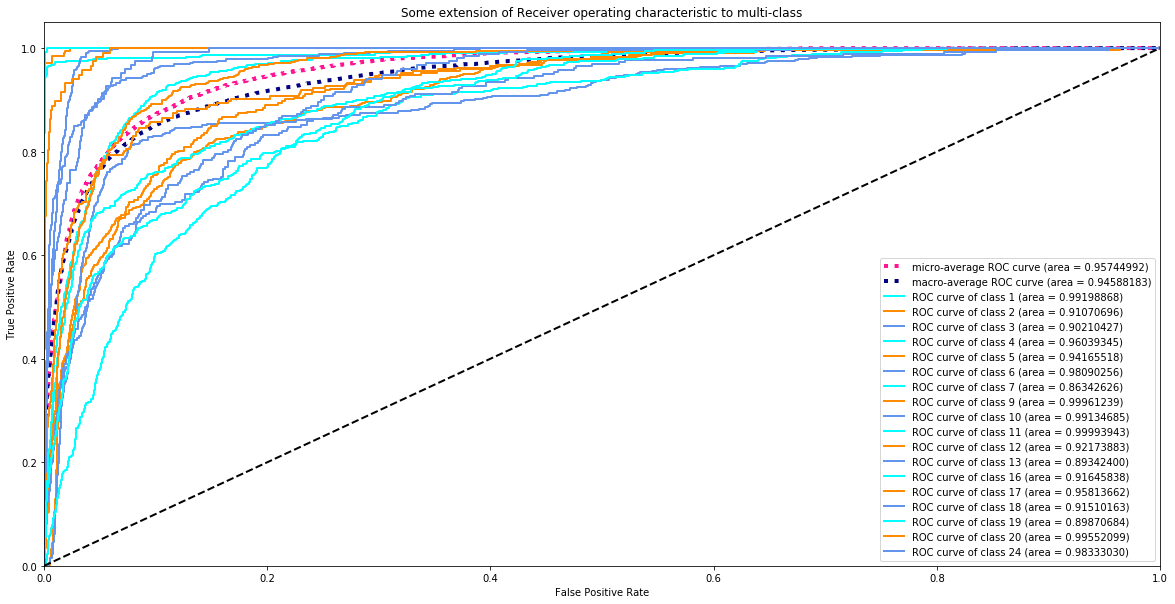

In [29]:
from itertools import cycle
y_test = label_binarize(y_test, classes=[1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 24])
y_score = grid.decision_function(X_test)
classes=[1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 24]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[classes[i]], tpr[classes[i]], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[classes[i]] = auc(fpr[classes[i]], tpr[classes[i]])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[classes[i]] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[classes[i]], tpr[classes[i]])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
# Plot all ROC curves
plt.figure(figsize=(20,10))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.8f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.8f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[classes[i]], tpr[classes[i]], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.8f})'
             ''.format(classes[i], roc_auc[classes[i]]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


In [30]:
print df

        timestamp  activityID  heart rate  IMU hand1  IMU hand2  IMU hand3  \
0           37.66           1         100     30.375    2.21530    8.27915   
1           37.67           1         100     30.375    2.29196    7.67288   
2           37.68           1         100     30.375    2.29090    7.14240   
3           37.69           1         100     30.375    2.21800    7.14365   
4           37.70           1         100     30.375    2.30106    7.25857   
5           37.71           1         100     30.375    2.07165    7.25965   
6           37.72           1         100     30.375    2.41148    7.59780   
7           37.73           1         100     30.375    2.32815    7.63431   
8           37.74           1         100     30.375    2.25096    7.78598   
9           37.75           1         100     30.375    2.14107    7.52262   
10          37.76           1         100     30.375    2.36727    7.63436   
11          37.77           1         100     30.375    2.43617 